<a href="https://colab.research.google.com/github/BC-Park/Practice/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
106/106 [==============================] - 8s 46ms/step - loss: 0.0029 - val_loss: 9.9463e-04
Epoch 2/20
106/106 [==============================] - 4s 38ms/step - loss: 9.2005e-04 - val_loss: 7.3793e-04
Epoch 3/20
106/106 [==============================] - 4s 38ms/step - loss: 6.3126e-04 - val_loss: 5.4432e-04
Epoch 4/20
106/106 [==============================] - 4s 

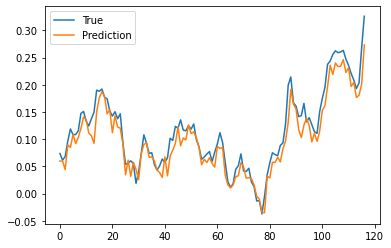

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

# from google.colab import files
# myfile = files.upload()              # Local Drive File 직접 올리기

# from google.colab import drive       # Google Drive Mount
# drive.mount('/content/drive')

data = pd.read_csv("drive/MyDrive/Colab Notebooks/005930.KS.csv")
data.head()

high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index:index+sequence_length])

normalized_data = []
for window in result:
  normalized_window = [((float(p)/float(window[0]))-1) for p in window]
  normalized_data.append(normalized_window)

result = np.array(normalized_data)

row = int(round(result.shape[0] * 0.9))
train = result[:row,:] 
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

model.fit(x_train, y_train,
  validation_data=(x_test, y_test),
  batch_size=10,
  epochs=20)

pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
df = pd.DataFrame(
    {
     "Name": [
     "Braund, Mr. Owen Harris",
     "Allen, Mr. William Henry",
     "Bonnell, Miss. Elizabeth",
      ],
     "Age": [22, 35, 58],
     "Sex": ["male", "male", "female"],
     }
     )
df
df["Name"]
df["Age"]
df["Sex"]
ages = pd.Series(df["Age"])

df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [ ]:
titanic = pd.read_csv("drive/MyDrive/Colab Notebooks/titanic.csv") # CSV 파일 열기
# titanic = pd.read_excel("drive/MyDrive/Colab Notebooks/titanic.xlsx", sheet_name="passengers")   # Excel 파일 열기

# titanic.describe() # Data 개요
# titanic.head(8) # 앞 8열의 Data만
# titanic.dtypes # Data Type 확인
# titanic.tail(8)
# titanic["Fare"] # Fare 열의 값 확인
# titanic.to_excel("drive/MyDrive/Colab Notebooks/titanic.xlsx", sheet_name="passengers", index=False)   # Excel로 저장하기
# titanic.info() # 개괄적 정보

# ages = titanic["Age"]
# ages.head(5)
# type(titanic)
# type(titanic["Age"])
# titanic["Age"].shape
# titanic.shape
# age_sex = titanic[["Age", "Sex"]]
# age_sex.head()
# titanic[["Age", "Sex"]]
# above_35 = titanic[titanic["Age"] > 35] # 35세 이상
# above_35

# When combining multiple conditional statements, each condition must be surrounded by parentheses ().
# Moreover, you can not use or/and but need to use the or operator | and the and operator &.

# survived_women = titanic[(titanic["Survived"] == 1) & (titanic["Sex"]=="female")] 
# survived_women

# Similar to the conditional expression, the isin() conditional function returns a True for each row the values are in
# the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets []

# class_23 = titanic[titanic["Pclass"].isin([2, 3])]
# class_23

# adult_names = titanic.loc[titanic["Age"] > 35, ["Name","Age"]]
# adult_names

# age_no_na = titanic[titanic["Age"].notna()]
# age_no_na
# age_no_na.shape

# When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.
# When specifically interested in certain rows and/or columns based on their position in the table, use the
# iloc operator in front of the selection brackets [].


# survived_women_names = titanic.loc[titanic["Survived"] == 1, ["Name","Age"]]
# len(survived_women_names)

# titanic.iloc[0:25, 2:5]

# When selecting specific rows and/or columns with loc or iloc, new values can be assigned to the selected data. For
# example, to assign the name anonymous to the first 3 elements of the third column
# titanic.iloc[0:3, 3] = "anonymous"












,Pclass,Name,Sex
0,3,"Braund, Mr. Owen Harris",male
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,3,"Allen, Mr. William Henry",male
5,3,"Moran, Mr. James",male
6,1,"McCarthy, Mr. Timothy J",male
7,3,"Palsson, Master. Gosta Leonard",male
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
air_quality = pd.read_csv("drive/MyDrive/Colab Notebooks/air_quality_no2.csv",index_col=0, parse_dates=True) # CSV 파일 열기
air_quality.head()
air_quality.describe()
air_quality.dtypes
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


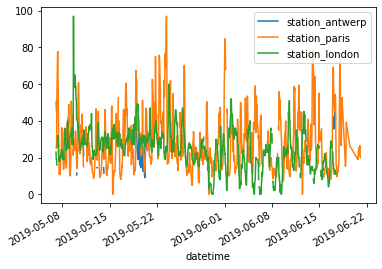

In [2]:
air_quality.plot()

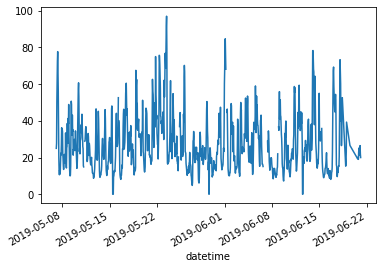

In [3]:
air_quality["station_paris"].plot()

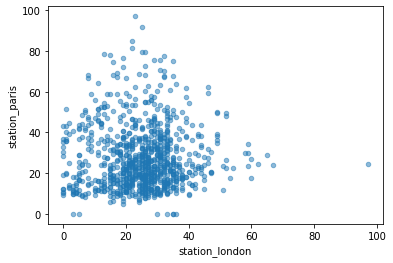

In [4]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


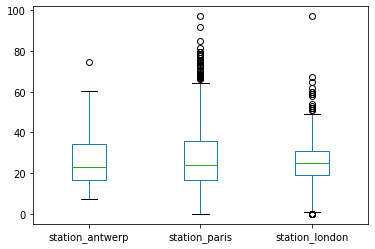

In [5]:
air_quality.plot.box()

In [ ]:
 [
method_name
for method_name in dir(air_quality.plot)
if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

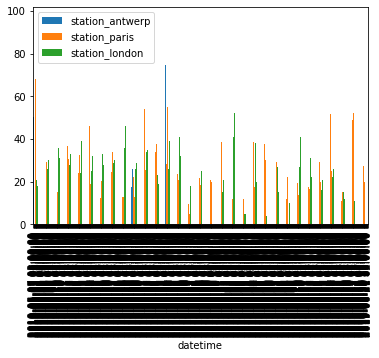

In [6]:
air_quality.plot.bar()

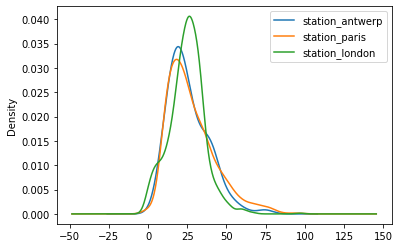

In [7]:
air_quality.plot.density()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05768f7198>,
      dtype=object)

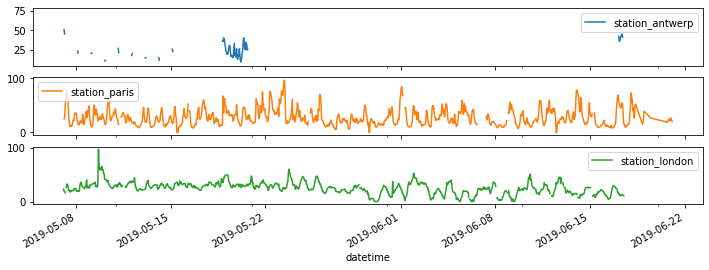

In [8]:
air_quality.plot.line(figsize=(12, 4), subplots=True)

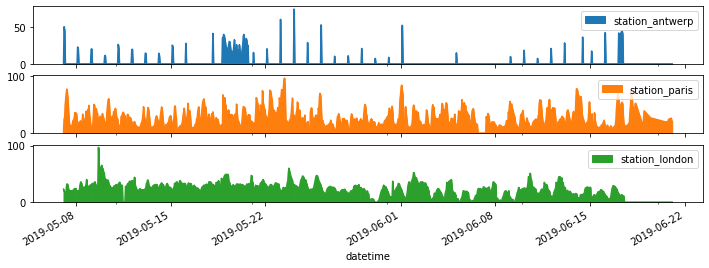

In [9]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

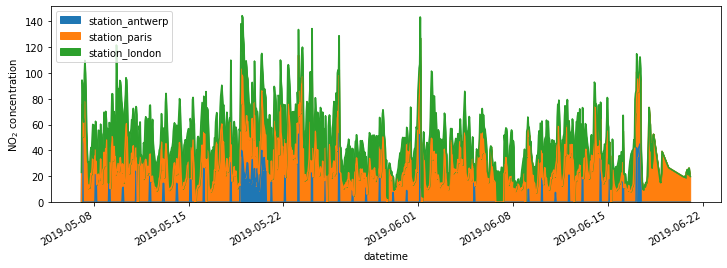

In [14]:
fig, axs = plt.subplots(figsize=(12,4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("drive/MyDrive/Colab Notebooks/no2_concentration.png")

In [16]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

air_quality["ratio_paris_antwerp"] = air_quality["station_paris"] / air_quality["station_antwerp"]
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [17]:
air_quality_renamed = air_quality.rename(
    columns = {
        "station_antwerp" : "BETR801",
        "station_paris" :"FR04014",
        "station_london" : "London Westerminster"
    }
)
air_quality_renamed.head()

,BETR801,FR04014,London Westerminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [19]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westerminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
